# Predicting GameStop Stock Prices
In this project, we predict the closing price of GameStop (GME) stock using historical data from Kaggle. 
We use a regression algorithm since the goal is to predict a continuous numerical value (price).

R²: 0.668


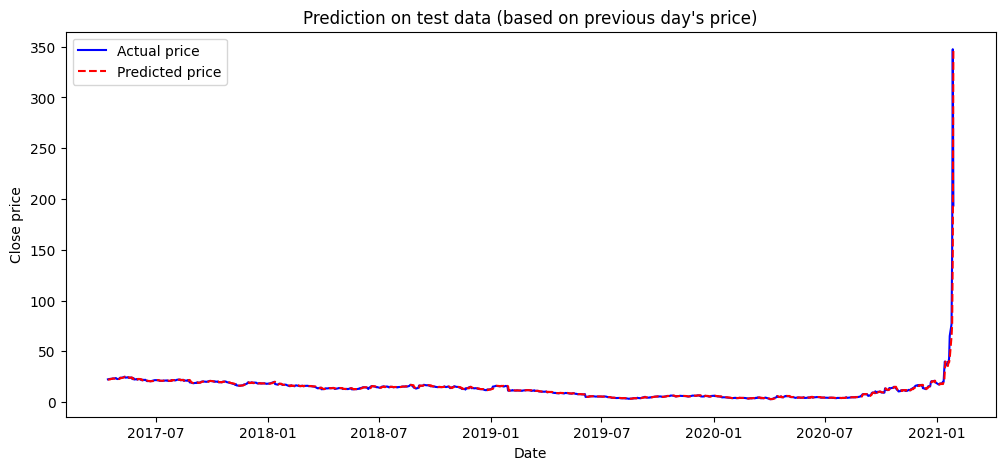


Confusion Matrix (up/down):
[[259 234]
 [233 228]]
Directional accuracy: 0.51

Predicted closing price for 2025-11-01: 34.12
(Model accuracy R²=0.668, Directional=0.51)


np.float64(34.11891729812987)

In [26]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, confusion_matrix
import numpy as np

# Read and sort the data by date
df = pd.read_csv("./data/GME_stock.csv")
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values('date').reset_index(drop=True)

# Create a new column with yesterday’s closing price
# (this will be used to predict today’s closing price)
df['prev_close'] = df['close_price'].shift(1)
df = df.dropna()  # remove the first row since it has no previous day

# Split the data into training (80%) and test (20%) sets
split = int(len(df)*0.8)
train_df = df.iloc[:split]
test_df  = df.iloc[split:]

# Train a simple linear regression model using prev_close → close
X_train = train_df[['prev_close']]
y_train = train_df['close_price']
X_test  = test_df[['prev_close']]
y_test  = test_df['close_price']

model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Evaluate using only R² since this is regression
r2 = r2_score(y_test, y_pred)
print(f"R²: {r2:.3f}")

# Plot the actual vs predicted closing prices
plt.figure(figsize=(12,5))
plt.plot(test_df['date'], y_test, label="Actual price", color="blue")
plt.plot(test_df['date'], y_pred, label="Predicted price", color="red", linestyle="--")
plt.xlabel("Date")
plt.ylabel("Close price")
plt.title("Prediction on test data (based on previous day's price)")
plt.legend()
plt.show()

# Create a confusion matrix based on direction (up or down)
# This checks if the model predicted the correct direction of price movement
actual_up = np.where(np.diff(y_test) > 0, 1, 0)
pred_up   = np.where(np.diff(y_pred) > 0, 1, 0)

# Make sure both arrays are the same length
min_len = min(len(actual_up), len(pred_up))
actual_up = actual_up[:min_len]
pred_up   = pred_up[:min_len]

# Calculate confusion matrix and directional accuracy
cm = confusion_matrix(actual_up, pred_up)
accuracy = (cm[0,0] + cm[1,1]) / cm.sum()

print("\nConfusion Matrix (up/down):")
print(cm)
print(f"Directional accuracy: {accuracy:.2f}")

# Function to predict future prices day by day
# Uses the model recursively for each day ahead
def predict_price_on(date_str):
    d = pd.to_datetime(date_str)
    days_ahead = (d - df['date'].iloc[-1]).days
    future_price = df['close_price'].iloc[-1]
    for _ in range(max(0, days_ahead)):
        future_price = model.predict([[future_price]])[0]
    print(f"\nPredicted closing price for {d.date()}: {future_price:.2f}")
    print(f"(Model accuracy R²={r2:.3f}, Directional={accuracy:.2f})")
    return future_price

# Example: predict the closing price for a future date
predict_price_on("2025-11-01")

Model Selection and Results

We chose to use a regression algorithm since the goal is to predict a continuous value — the closing price of the GameStop stock.
Regression is more suitable than classification because we want to estimate a numeric value (the stock price), not a category such as “up” or “down.”

To keep the model simple and easy to understand, we used the previous day’s closing price to predict the next day’s price.
This approach is common in time series forecasting, as stock prices are usually correlated with their most recent values.

After training and testing, the model produced the following results:
	•	R²-score: 0.668
	•	Directional Accuracy: 0.51

The R² score of 0.668 means that the model explains about 66.8% of the variation in the test data, which is decent for such a simple linear model.
The directional accuracy of 0.51 shows that the model correctly predicts whether the stock goes up or down around 51% of the time, which is roughly random chance — something expected in stock market prediction, where prices are highly volatile and influenced by many external factors.

The predicted closing price for 2025-11-01 was 34.12 USD, based on the most recent price in the dataset.

In summary, this simple regression model demonstrates the basic principles of machine learning prediction, but also highlights the challenges of forecasting real-world stock prices using only historical data.